<a href="https://colab.research.google.com/github/howonleee/new-project/blob/main/11_10project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing Libraries
# pip3 install graphviz
#pip3 install dask
#pip3 install toolz
#pip3 install cloudpickle
# https://www.youtube.com/watch?v=ieW3G7ZzRZ0
# https://github.com/dask/dask-tutorial
# please do go through this python notebook: https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
import dask.dataframe as dd#similar to pandas

import pandas as pd#pandas to create small dataframes 

# pip3 install folium
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
!pip3 install gpxpy
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# download migwin: https://mingw-w64.org/doku.php/download/mingw-builds
# install it in your system and keep the path, migw_path ='installed path'
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to install xgboost: pip3 install xgboost
# if it didnt happen check install_xgboost.JPG
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 7.1 MB/s 
  Created wheel for gpxpy: filename=gpxpy-1.5.0-py3-none-any.whl size=42901 sha256=c19b69f59987d122385839503e28840d8f5e8ab4d067cd9e52ed84fd4d4a8316
  Stored in directory: /root/.cache/pip/wheels/78/49/b6/d1851fcb4ee10fa784325d7fcf6c97789157c706ab3a71e2b6
Successfully built gpxpy


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
filename_gzip = '/content/drive/MyDrive/2016_Yellow_Taxi_Trip_Data.csv'

In [16]:
month_csv = pd.read_csv(filename_gzip, nrows=1000000, error_bad_lines=False)

In [17]:
month_csv.head(100)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
0,2,01/01/2016 12:00:00 AM,01/01/2016 12:18:30 AM,2,5.52,-73.980118,40.743050,1,N,-73.913490,...,2,19.0,0.5,0.5,0.00,0.0,0.3,20.30,NaN,NaN
1,2,01/01/2016 12:00:00 AM,01/01/2016 12:00:00 AM,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80,NaN,NaN
2,2,01/01/2016 12:00:00 AM,01/01/2016 12:00:00 AM,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,1,33.0,0.5,0.5,0.00,0.0,0.3,34.30,NaN,NaN
3,2,01/01/2016 12:00:00 AM,01/01/2016 12:26:45 AM,2,7.45,-73.994057,40.719990,1,N,-73.966362,...,2,26.0,0.5,0.5,0.00,0.0,0.3,27.30,NaN,NaN
4,2,01/01/2016 12:00:00 AM,01/01/2016 12:00:00 AM,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,2,16.5,0.0,0.5,0.00,0.0,0.3,17.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,01/01/2016 12:01:08 AM,01/01/2016 12:23:22 AM,1,5.00,-74.002266,40.730370,1,N,-73.951683,...,1,19.5,0.5,0.5,4.50,0.0,0.3,25.30,NaN,NaN
96,2,01/01/2016 12:01:09 AM,01/01/2016 12:05:23 AM,1,0.58,-73.998077,40.737968,1,N,-74.004128,...,1,5.0,0.5,0.5,1.26,0.0,0.3,7.56,NaN,NaN
97,1,01/01/2016 12:01:09 AM,01/01/2016 12:06:37 AM,2,1.60,-73.980827,40.779640,1,N,-73.971413,...,1,6.5,0.5,0.5,1.55,0.0,0.3,9.35,NaN,NaN
98,1,01/01/2016 12:01:10 AM,01/01/2016 12:36:55 AM,2,6.00,-73.999443,40.729836,1,N,-73.964180,...,1,25.5,0.5,0.5,5.36,0.0,0.3,32.16,NaN,NaN


# 새 섹션

In [19]:
print(month_csv.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'PULocationID',
       'DOLocationID'],
      dtype='object')


In [20]:
month = dd.from_pandas(month_csv, npartitions=1)

In [21]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.pickup_longitude <= -74.15) | (month.pickup_latitude <= 40.5774)| \
                   (month.pickup_longitude >= -73.7004) | (month.pickup_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

In [26]:
#The timestamps are converted to unix so as to get duration(trip-time) & speed also pickup-times in unix are used while binning 

# in out data we have time in the formate "YYYY-MM-DD HH:MM:SS" we convert thiss sting to python time formate and then into unix time stamp
# https://stackoverflow.com/a/27914405
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%m/%d/%Y %H:%M:%S %p").timetuple())



# we return a data frame which contains the columns
# 1.'passenger_count' : self explanatory
# 2.'trip_distance' : self explanatory
# 3.'pickup_longitude' : self explanatory
# 4.'pickup_latitude' : self explanatory
# 5.'dropoff_longitude' : self explanatory
# 6.'dropoff_latitude' : self explanatory
# 7.'total_amount' : total fair that was paid
# 8.'trip_times' : duration of each trip
# 9.'pickup_times : pickup time converted into unix time 
# 10.'Speed' : velocity of each trip
def return_with_trip_times(month):
    duration = month[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()
    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of trips
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])
    
    return new_frame

# print(frame_with_durations.head())
#  passenger_count	trip_distance	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	total_amount	trip_times	pickup_times	Speed
#   1                  1.59	      -73.993896        	40.750111    	-73.974785      	40.750618           	17.05   	 18.050000	1.421329e+09	5.285319
#   1               	3.30    	-74.001648      	40.724243   	-73.994415      	40.759109           	17.80   	19.833333	1.420902e+09	9.983193
#   1               	1.80     	-73.963341      	40.802788     	-73.951820      	40.824413           	10.80   	10.050000	1.420902e+09	10.746269
#   1               	0.50    	-74.009087      	40.713818    	-74.004326       	40.719986           	4.80    	1.866667	1.420902e+09	16.071429
#   1               	3.00    	-73.971176      	40.762428    	-74.004181      	40.742653           	16.30   	19.316667	1.420902e+09	9.318378
frame_with_durations = return_with_trip_times(month)

In [27]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -719.8833333333333
10 percentile value is 3.183333333333333
20 percentile value is 4.716666666666667
30 percentile value is 6.133333333333334
40 percentile value is 7.616666666666666
50 percentile value is 9.25
60 percentile value is 11.183333333333334
70 percentile value is 13.633333333333333
80 percentile value is 17.116666666666667
90 percentile value is 23.383333333333333
100 percentile value is  10128.65


In [28]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 23.383333333333333
91 percentile value is 24.4
92 percentile value is 25.566666666666666
93 percentile value is 26.9
94 percentile value is 28.533333333333335
95 percentile value is 30.55
96 percentile value is 33.233333333333334
97 percentile value is 37.233333333333334
98 percentile value is 44.11666666666667
99 percentile value is 167.33333333333334
100 percentile value is  10128.65


In [29]:
#removing data based on our analysis and TLC regulations
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times<720)]

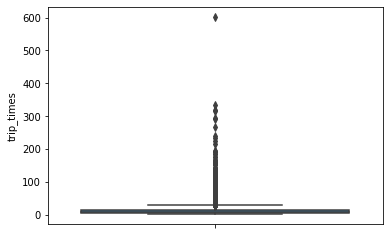

In [36]:
#box-plot after removal of outliers
%matplotlib inline
sns.boxplot(y="trip_times", data =frame_with_durations_modified)
plt.show()

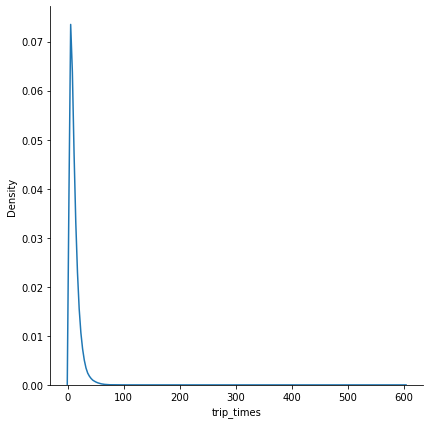

In [37]:
#pdf of trip-times after removing the outliers
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"trip_times") \
      .add_legend();
plt.show();

In [38]:
#converting the values to log-values to chec for log-normal
import math
frame_with_durations_modified['log_times']=[math.log(i) for i in frame_with_durations_modified['trip_times'].values]

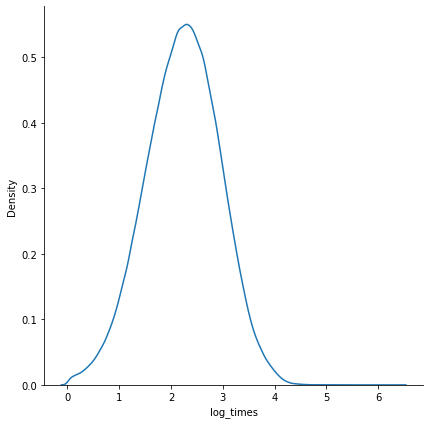

In [39]:
#pdf of log-values
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"log_times") \
      .add_legend();
plt.show();

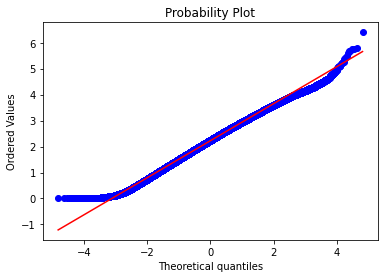

In [40]:
#Q-Q plot for checking if trip-times is log-normal
import scipy
scipy.stats.probplot(frame_with_durations_modified['log_times'].values, plot=plt)
plt.show()

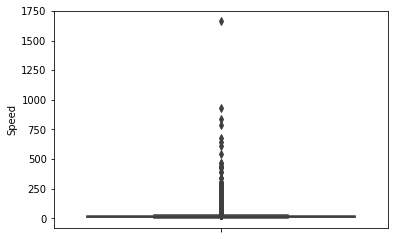

In [41]:
# check for any outliers in the data after trip duration outliers removed
# box-plot for speeds with outliers
frame_with_durations_modified['Speed'] = 60*(frame_with_durations_modified['trip_distance']/frame_with_durations_modified['trip_times'])
sns.boxplot(y="Speed", data =frame_with_durations_modified)
plt.show()

In [42]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 7.762803234501348
20 percentile value is 9.406175771971498
30 percentile value is 10.664383561643836
40 percentile value is 11.826714801444044
50 percentile value is 13.026315789473687
60 percentile value is 14.4
70 percentile value is 16.161849710982658
80 percentile value is 18.791208791208792
90 percentile value is 24.1340782122905
100 percentile value is  1667.1313672922254


In [43]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 24.1340782122905
91 percentile value is 24.973966309341506
92 percentile value is 25.919999999999998
93 percentile value is 27.0
94 percentile value is 28.219154443485767
95 percentile value is 29.661478599221795
96 percentile value is 31.31853194381513
97 percentile value is 33.374536464771325
98 percentile value is 35.97914252607185
99 percentile value is 39.70749542961609
100 percentile value is  1667.1313672922254


In [44]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 39.70749542961609
99.1 percentile value is 40.23116883116883
99.2 percentile value is 40.738007380073796
99.3 percentile value is 41.33097345132744
99.4 percentile value is 41.987041036717066
99.5 percentile value is 42.67305061559507
99.6 percentile value is 43.50262697022767
99.7 percentile value is 44.588340807174895
99.8 percentile value is 45.96923076923077
99.9 percentile value is 48.12307692307692
100 percentile value is  1667.1313672922254


In [46]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations[(frame_with_durations.Speed>0) & (frame_with_durations.Speed<50)]

In [47]:
#avg.speed of cabs in New-York
sum(frame_with_durations_modified["Speed"]) / float(len(frame_with_durations_modified["Speed"]))

14.54194648770639

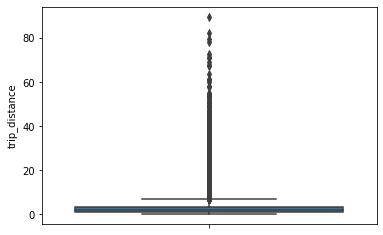

In [48]:
# up to now we have removed the outliers based on trip durations and cab speeds
# lets try if there are any outliers in trip distances
# box-plot showing outliers in trip-distance values
sns.boxplot(y="trip_distance", data =frame_with_durations_modified)
plt.show()

In [49]:
#calculating trip distance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 0.7
20 percentile value is 0.95
30 percentile value is 1.2
40 percentile value is 1.5
50 percentile value is 1.84
60 percentile value is 2.3
70 percentile value is 3.01
80 percentile value is 4.28
90 percentile value is 7.63
100 percentile value is  89.7


In [50]:
#calculating trip distance values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 7.63
91 percentile value is 8.3
92 percentile value is 9.0
93 percentile value is 9.7
94 percentile value is 10.5
95 percentile value is 11.6
96 percentile value is 13.53
97 percentile value is 16.53
98 percentile value is 17.86
99 percentile value is 19.22
100 percentile value is  89.7


In [51]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 19.22
99.1 percentile value is 19.41
99.2 percentile value is 19.65
99.3 percentile value is 19.9
99.4 percentile value is 20.2
99.5 percentile value is 20.52
99.6 percentile value is 20.9
99.7 percentile value is 21.37
99.8 percentile value is 22.1
99.9 percentile value is 24.6
100 percentile value is  89.7


In [52]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_distance>0) & (frame_with_durations.trip_distance<23)]

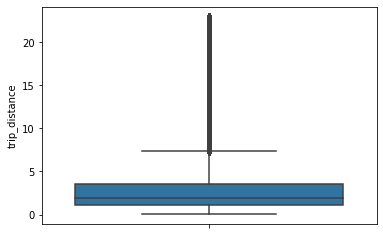

In [53]:
#box-plot after removal of outliers
sns.boxplot(y="trip_distance", data = frame_with_durations_modified)
plt.show()

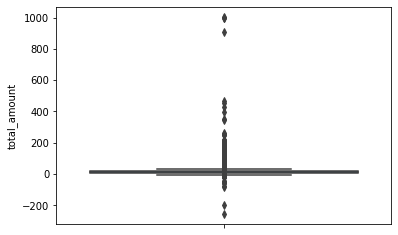

In [54]:
# up to now we have removed the outliers based on trip durations, cab speeds, and trip distances
# lets try if there are any outliers in based on the total_amount
# box-plot showing outliers in fare
sns.boxplot(y="total_amount", data =frame_with_durations_modified)
plt.show()

In [55]:
#calculating total fare amount values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -258.2
10 percentile value is 6.3
20 percentile value is 7.55
30 percentile value is 8.75
40 percentile value is 9.8
50 percentile value is 11.16
60 percentile value is 12.8
70 percentile value is 15.3
80 percentile value is 19.3
90 percentile value is 29.84
100 percentile value is  1004.94


In [56]:
#calculating total fare amount values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 29.84
91 percentile value is 32.3
92 percentile value is 34.8
93 percentile value is 37.34
94 percentile value is 40.3
95 percentile value is 43.8
96 percentile value is 49.61
97 percentile value is 58.34
98 percentile value is 63.34
99 percentile value is 69.99
100 percentile value is  1004.94


In [57]:
#calculating total fare amount values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 69.99
99.1 percentile value is 70.01
99.2 percentile value is 70.01
99.3 percentile value is 70.01
99.4 percentile value is 70.01
99.5 percentile value is 71.21
99.6 percentile value is 72.92
99.7 percentile value is 75.84
99.8 percentile value is 82.56
99.9 percentile value is 93.84
100 percentile value is  1004.94


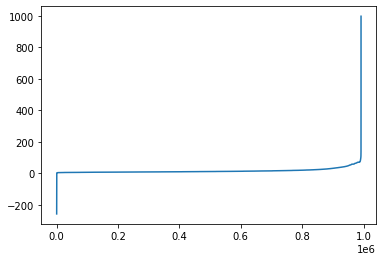

In [58]:
#below plot shows us the fare values(sorted) to find a sharp increase to remove those values as outliers
# plot the fare amount excluding last two values in sorted data
plt.plot(var[:-2])
plt.show()

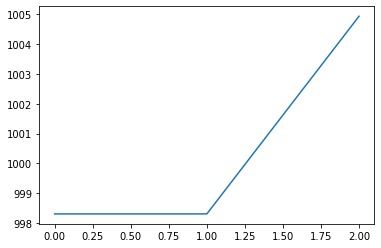

In [59]:
# a very sharp increase in fare values can be seen 
# plotting last three total fare values, and we can observe there is share increase in the values
plt.plot(var[-3:])
plt.show()

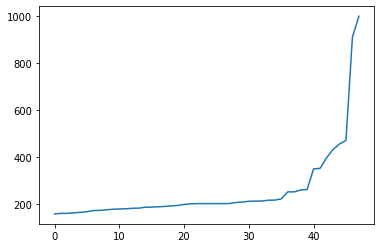

In [60]:
#now looking at values not including the last two points we again find a drastic increase at around 1000 fare value
# we plot last 50 values excluding last two values
plt.plot(var[-50:-2])
plt.show()